In [69]:
import pandas as pd
import numpy as np
import scipy.integrate as integrate
import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_csv("point040incV1.csv")
df = df.round(decimals=3)

In [71]:
# mixeddf = df[df['Mixed']]
# mixeddf.sort_values('P1')
# mixeddf.to_csv("mixed.csv")

In [72]:
mixeddf = pd.read_csv("mixed.csv")

In [73]:
# mixpimax = mixeddf['pi'].max()
# mixpimin = mixeddf['pi'].min()
# mixpiunq = mixeddf['pi'].unique()

# print(f"pi max = {mixpimax}")
# print(f"pi min = {mixpimin}")
# print(f"vals include {mixpiunq}")

In [74]:
ccdf = df[df['CC']==True]
ccpimax = ccdf['pi'].max()
ccpimin = ccdf['pi'].min()
ccpiunq = ccdf['pi'].unique()

print(f"pi max = {ccpimax}")
print(f"pi min = {ccpimin}")
print(f"vals include {ccpiunq}")
ccdf

pi max = 1.0
pi min = 0.52
vals include [0.52 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.  ]


,Unnamed: 0,b1,b2,theta_upper,theta_lower,fc,fd,pi,u1cc,u2cc,...,u2cd,u1dc,u2dc,CC,DD,CD,DC,P1,P2,Mixed
1373150,0,0.00,0.04,0.08,0.04,1,1,0.52,0.02,0.081,...,0.078,0.019,0.082,True,False,False,False,-inf,-inf,False
1373174,0,0.00,0.04,0.12,0.08,1,1,0.52,0.02,0.121,...,0.118,0.019,0.122,True,False,False,False,1.729382e+14,1.729382e+14,False
1373197,0,0.00,0.04,0.16,0.12,1,1,0.52,0.02,0.161,...,0.158,0.019,0.162,True,False,False,False,-inf,-inf,False
1373219,0,0.00,0.04,0.20,0.16,1,1,0.52,0.02,0.201,...,0.198,0.019,0.202,True,False,False,False,-8.646911e+13,-8.646911e+13,False
1373240,0,0.00,0.04,0.24,0.20,1,1,0.52,0.02,0.241,...,0.238,0.019,0.242,True,False,False,False,8.646911e+13,8.646911e+13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746245,0,0.96,1.00,0.96,0.88,1,1,1.00,0.98,0.020,...,0.000,0.860,0.060,True,False,False,False,2.000000e+00,2.000000e+00,False
2746246,0,0.96,1.00,1.00,0.88,1,1,1.00,0.98,0.020,...,0.000,0.840,0.080,True,False,False,False,1.500000e+00,1.500000e+00,False
2746247,0,0.96,1.00,0.96,0.92,1,1,1.00,0.98,0.020,...,0.000,0.920,0.040,True,False,False,False,-inf,-inf,False
2746248,0,0.96,1.00,1.00,0.92,1,1,1.00,0.98,0.020,...,0.000,0.900,0.060,True,False,False,False,2.000000e+00,2.000000e+00,False


In [75]:
cddf = df[df['CD']==True]
cdpimax = cddf['pi'].max()
cdpimin = cddf['pi'].min()
cdpiunq = cddf['pi'].unique()

print(f"pi max = {cdpimax}")
print(f"pi min = {cdpimin}")
print(f"vals include {cdpiunq}")
cddf

pi max = 0.96
pi min = 0.04
vals include [0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96]


,Unnamed: 0,b1,b2,theta_upper,theta_lower,fc,fd,pi,u1cc,u2cc,...,u2cd,u1dc,u2dc,CC,DD,CD,DC,P1,P2,Mixed
105647,0,0.00,0.04,0.92,0.00,1,1,0.04,0.001,0.038,...,1.344,0.461,0.056,False,True,True,False,-1.840,-1.840,False
105648,0,0.00,0.04,0.96,0.00,1,1,0.04,0.001,0.039,...,1.402,0.480,0.058,False,False,True,False,-1.838,-1.838,False
105649,0,0.00,0.04,1.00,0.00,1,1,0.04,0.001,0.039,...,1.421,0.499,0.059,False,False,True,False,-1.763,-1.763,False
105673,0,0.00,0.04,1.00,0.04,1,1,0.04,0.020,0.097,...,1.402,0.480,0.058,False,True,True,False,-2.107,-2.107,False
211260,0,0.00,0.04,0.44,0.00,1,1,0.08,0.002,0.037,...,0.626,0.221,0.054,False,False,True,False,-1.676,-1.676,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534933,0,0.96,1.00,1.00,0.52,1,1,0.92,0.945,0.020,...,0.021,0.374,0.239,False,False,True,False,0.996,0.996,False
2640322,0,0.96,1.00,0.92,0.00,1,1,0.96,0.902,0.019,...,0.019,0.056,0.461,True,False,True,False,1.000,1.000,False
2640323,0,0.96,1.00,0.96,0.00,1,1,0.96,0.941,0.019,...,0.020,0.058,0.480,False,False,True,False,0.998,0.998,False
2640324,0,0.96,1.00,1.00,0.00,1,1,0.96,0.941,0.019,...,0.021,0.059,0.499,False,False,True,False,0.997,0.997,False


In [76]:
dddf = df[df['DD']]
ddpimax = dddf['pi'].max()
ddpimin = dddf['pi'].min()
ddpiunq = dddf['pi'].unique()

print(f"pi max = {ddpimax}")
print(f"pi min = {ddpimin}")
print(f"vals include {ddpiunq}")
dddf

pi max = 0.48
pi min = 0.0
vals include [0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48]


,Unnamed: 0,b1,b2,theta_upper,theta_lower,fc,fd,pi,u1cc,u2cc,...,u2cd,u1dc,u2dc,CC,DD,CD,DC,P1,P2,Mixed
0,0,0.00,0.04,0.04,0.00,1,1,0.00,0.000,0.00,...,0.080,0.040,0.000,False,True,False,False,-3.000000e+00,-3.000000e+00,False
1,0,0.00,0.04,0.08,0.00,1,1,0.00,0.000,0.00,...,0.140,0.060,0.000,False,True,False,False,-2.500000e+00,-2.500000e+00,False
2,0,0.00,0.04,0.12,0.00,1,1,0.00,0.000,0.00,...,0.200,0.080,0.000,False,True,False,False,-2.333000e+00,-2.333000e+00,False
3,0,0.00,0.04,0.16,0.00,1,1,0.00,0.000,0.00,...,0.260,0.100,0.000,False,True,False,False,-2.250000e+00,-2.250000e+00,False
4,0,0.00,0.04,0.20,0.00,1,1,0.00,0.000,0.00,...,0.320,0.120,0.000,False,True,False,False,-2.200000e+00,-2.200000e+00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373110,0,0.96,1.00,0.84,0.80,1,1,0.48,0.839,0.02,...,0.021,0.842,0.019,False,True,False,False,2.305843e+14,2.305843e+14,False
1373115,0,0.96,1.00,0.88,0.84,1,1,0.48,0.879,0.02,...,0.021,0.882,0.019,False,True,False,False,2.305843e+14,2.305843e+14,False
1373119,0,0.96,1.00,0.92,0.88,1,1,0.48,0.919,0.02,...,0.021,0.922,0.019,False,True,False,False,2.305843e+14,2.305843e+14,False
1373122,0,0.96,1.00,0.96,0.92,1,1,0.48,0.959,0.02,...,0.021,0.962,0.019,False,True,False,False,2.305843e+14,2.305843e+14,False


In [77]:
dcdf = df[df['DC']]
dcpimax = cddf['pi'].max()
dcpimin = cddf['pi'].min()
dcpiunq = cddf['pi'].unique()

print(f"pi max = {dcpimax}")
print(f"pi min = {dcpimin}")
print(f"vals include {dcpiunq}")
dcdf

pi max = 0.96
pi min = 0.04
vals include [0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96]


,Unnamed: 0,b1,b2,theta_upper,theta_lower,fc,fd,pi,u1cc,u2cc,...,u2cd,u1dc,u2dc,CC,DD,CD,DC,P1,P2,Mixed
210947,0,0.96,1.00,0.92,0.00,1,1,0.04,0.038,0.001,...,0.461,1.344,0.019,False,True,False,True,-0.000,-0.000,False
210948,0,0.96,1.00,0.96,0.00,1,1,0.04,0.039,0.001,...,0.480,1.402,0.020,False,False,False,True,0.002,0.002,False
210949,0,0.96,1.00,1.00,0.00,1,1,0.04,0.039,0.001,...,0.499,1.421,0.021,False,False,False,True,0.003,0.003,False
210973,0,0.96,1.00,1.00,0.04,1,1,0.04,0.097,0.020,...,0.480,1.402,0.020,False,True,False,True,-0.000,-0.000,False
316245,0,0.92,1.00,0.84,0.00,1,1,0.08,0.070,0.003,...,0.423,1.196,0.037,False,True,False,True,-0.000,-0.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429771,0,0.00,0.08,1.00,0.08,1,1,0.92,0.040,0.893,...,0.114,0.040,1.306,True,False,False,True,3.292,3.292,False
2535022,0,0.00,0.04,0.92,0.00,1,1,0.96,0.019,0.902,...,0.056,0.019,1.344,True,False,False,True,2.840,2.840,False
2535023,0,0.00,0.04,0.96,0.00,1,1,0.96,0.019,0.941,...,0.058,0.020,1.402,False,False,False,True,2.838,2.838,False
2535024,0,0.00,0.04,1.00,0.00,1,1,0.96,0.019,0.941,...,0.059,0.021,1.421,False,False,False,True,2.763,2.763,False


In [78]:
# pi1q = df[df['pi']==0.2]
# pihalf = df[df['pi']==0.5]
# pi3q = df[df['pi']==0.8]

# pies = [pi1q, pihalf, pi3q]

# dfa = pi3q.groupby(["b1", "b2"]).size().rename_axis(['b1', 'b2']).reset_index()
# bees = dfa[['b1', 'b2']].values.tolist()

# i = 0
# for pie in pies:
#     for bee in bees: 
#         tempdf = pie[(pie['b1']==bee[0]) & (pie['b2']==bee[1])]
#         exec(f'df{i} = tempdf')
#         i+=1

In [79]:
# hold thetas and pi const (see below for values)
# graph b1 on x, b2 on y

# look to see if theres an estimate on what fraction of people like comedy for value of pi
# look for survey that asks how far people would be willing to travel to see a show in a city
    
# verdi macbeth

# places a dot whenever an equilib occurs, jitter to see all

# A- is perfect


       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.08  0.48          0.8          0.2   1   1  0.52  0.280  0.566  0.280   
1    0.08  0.52          0.8          0.2   1   1  0.52  0.290  0.556  0.290   
2    0.12  0.44          0.8          0.2   1   1  0.52  0.280  0.547  0.280   
3    0.12  0.48          0.8          0.2   1   1  0.52  0.300  0.546  0.300   
4    0.12  0.52          0.8          0.2   1   1  0.52  0.320  0.546  0.320   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
586  0.80  0.84          0.8          0.2   1   1  0.52  0.532  0.180  0.508   
587  0.84  0.88          0.8          0.2   1   1  0.52  0.532  0.140  0.508   
588  0.88  0.92          0.8          0.2   1   1  0.52  0.532  0.100  0.508   
589  0.92  0.96          0.8          0.2   1   1  0.52  0.532  0.060  0.508   
590  0.96  1.00          0.8          0.2   1   1  0.52  0.532  0.020  0.508   

      u2dd   u1cd   u2cd   u1dc   u2dc 

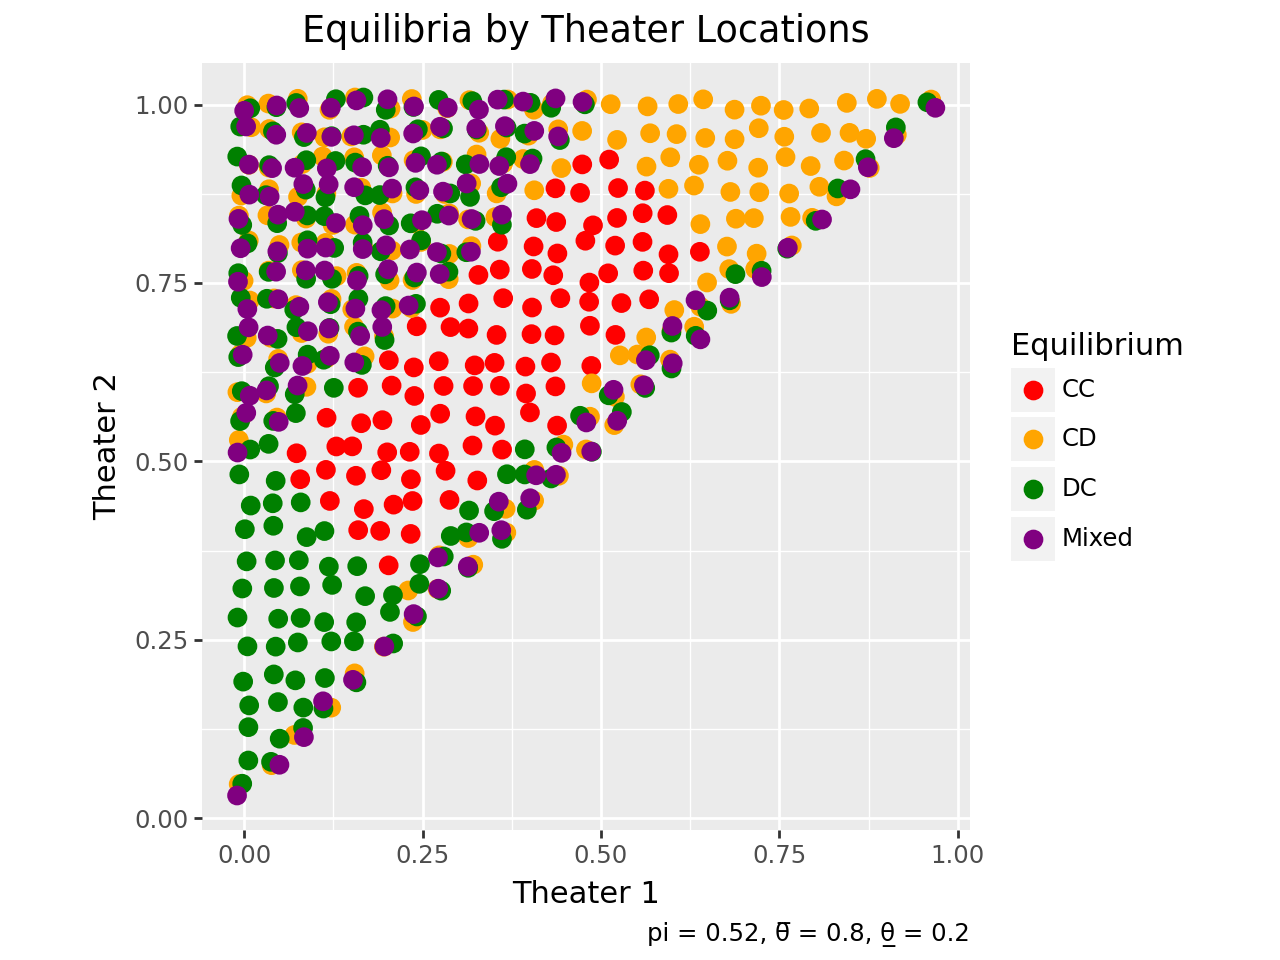

In [80]:
from plotnine import *

df123 = df[(df['pi']==0.52)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt1 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.52, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt1.save("V_2plot1")

plt1

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.04          0.8          0.2   1   1  0.48  0.020  0.508  0.020   
1    0.00  0.08          0.8          0.2   1   1  0.48  0.040  0.528  0.040   
2    0.00  0.12          0.8          0.2   1   1  0.48  0.060  0.548  0.060   
3    0.00  0.16          0.8          0.2   1   1  0.48  0.080  0.568  0.080   
4    0.00  0.20          0.8          0.2   1   1  0.48  0.100  0.588  0.100   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
586  0.80  0.84          0.8          0.2   1   1  0.48  0.508  0.180  0.532   
587  0.84  0.88          0.8          0.2   1   1  0.48  0.508  0.140  0.532   
588  0.88  0.92          0.8          0.2   1   1  0.48  0.508  0.100  0.532   
589  0.92  0.96          0.8          0.2   1   1  0.48  0.508  0.060  0.532   
590  0.96  1.00          0.8          0.2   1   1  0.48  0.508  0.020  0.532   

      u2dd   u1cd   u2cd   u1dc   u2dc 

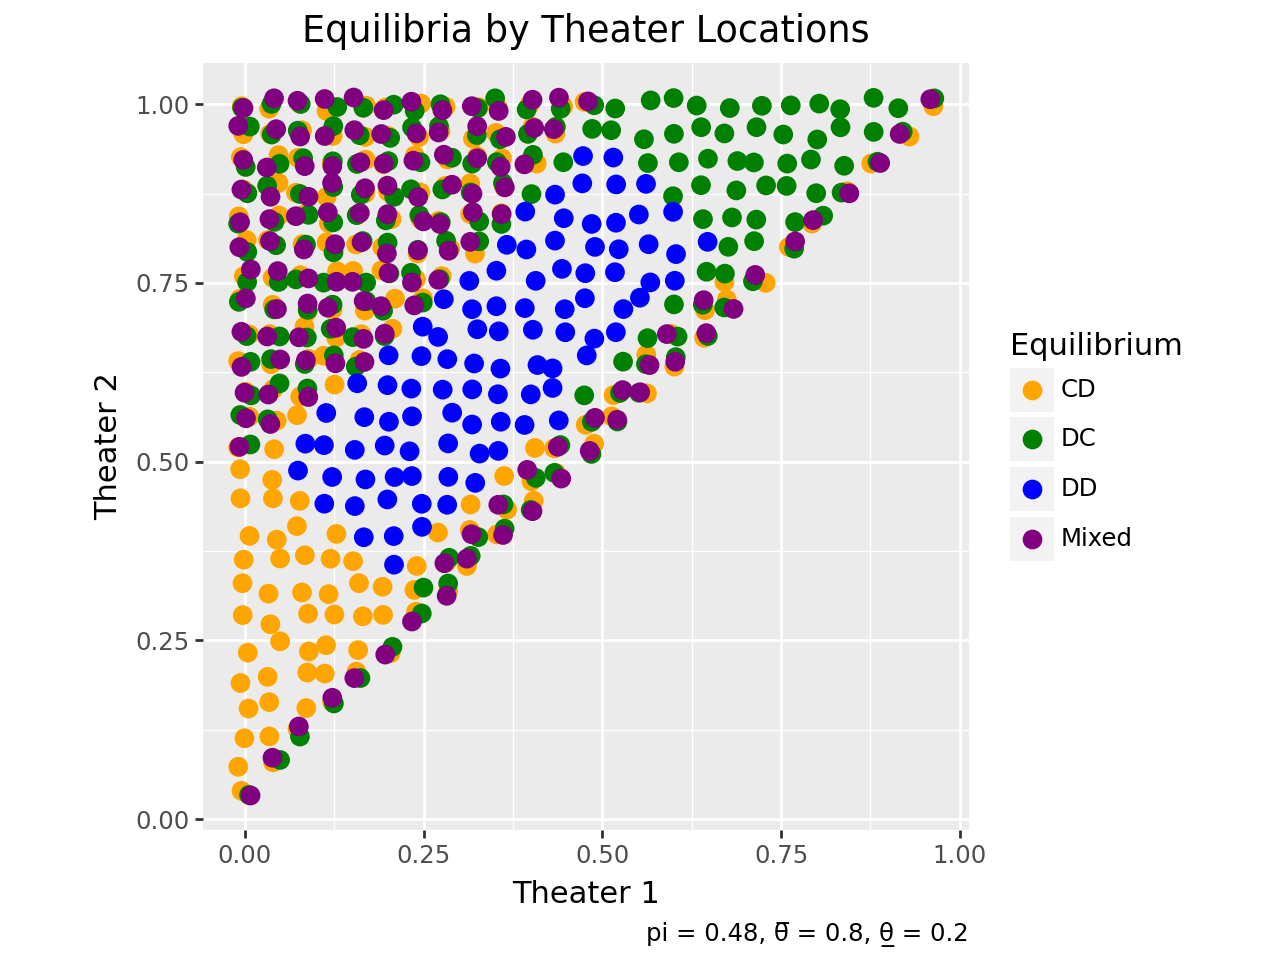

In [81]:
from plotnine import *

df123 = df[(df['pi']==0.48)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt2 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.48, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt2.save("V_2plot2")

plt2

       b1    b2  theta_upper  theta_lower  fc  fd   pi  u1cc  u2cc  u1dd  \
0    0.00  0.04          0.8          0.2   1   1  0.0  0.02  0.22  0.02   
1    0.00  0.08          0.8          0.2   1   1  0.0  0.04  0.24  0.04   
2    0.00  0.12          0.8          0.2   1   1  0.0  0.06  0.26  0.06   
3    0.00  0.16          0.8          0.2   1   1  0.0  0.08  0.28  0.08   
4    0.00  0.20          0.8          0.2   1   1  0.0  0.10  0.30  0.10   
..    ...   ...          ...          ...  ..  ..  ...   ...   ...   ...   
320  0.88  0.96          0.8          0.2   1   1  0.0  0.24  0.08  0.84   
321  0.88  1.00          0.8          0.2   1   1  0.0  0.26  0.06  0.86   
322  0.92  0.96          0.8          0.2   1   1  0.0  0.22  0.06  0.82   
323  0.92  1.00          0.8          0.2   1   1  0.0  0.24  0.04  0.84   
324  0.96  1.00          0.8          0.2   1   1  0.0  0.22  0.02  0.82   

     u2dd  u1cd  u2cd  u1dc  u2dc equilib  True_Value  
0    0.82   0.0  1.12  0.32   0

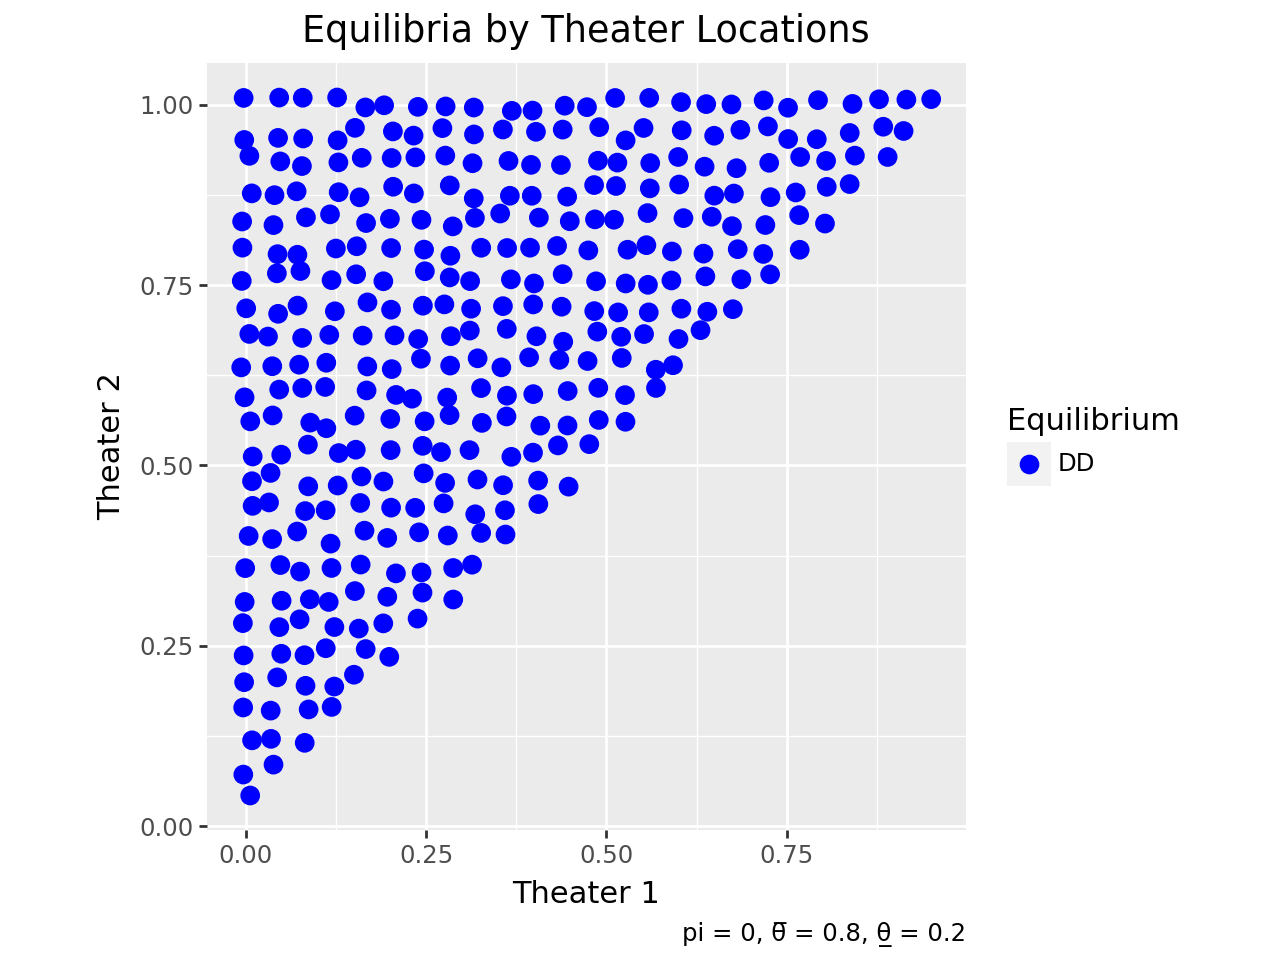

In [82]:
from plotnine import *

df123 = df[(df['pi']==0)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt4 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt4.save("V_2plot4")

plt4

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.04          0.8          0.2   1   1  0.36  0.020  0.436  0.020   
1    0.00  0.08          0.8          0.2   1   1  0.36  0.040  0.456  0.040   
2    0.00  0.12          0.8          0.2   1   1  0.36  0.060  0.476  0.060   
3    0.00  0.16          0.8          0.2   1   1  0.36  0.080  0.496  0.080   
4    0.00  0.20          0.8          0.2   1   1  0.36  0.100  0.516  0.100   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
340  0.04  0.96          0.8          0.2   1   1  0.36  0.334  0.334  0.406   
341  0.04  1.00          0.8          0.2   1   1  0.36  0.341  0.301  0.419   
342  0.08  0.96          0.8          0.2   1   1  0.36  0.366  0.326  0.434   
343  0.08  1.00          0.8          0.2   1   1  0.36  0.374  0.294  0.446   
344  0.12  1.00          0.8          0.2   1   1  0.36  0.406  0.286  0.474   

      u2dd   u1cd   u2cd   u1dc   u2dc 

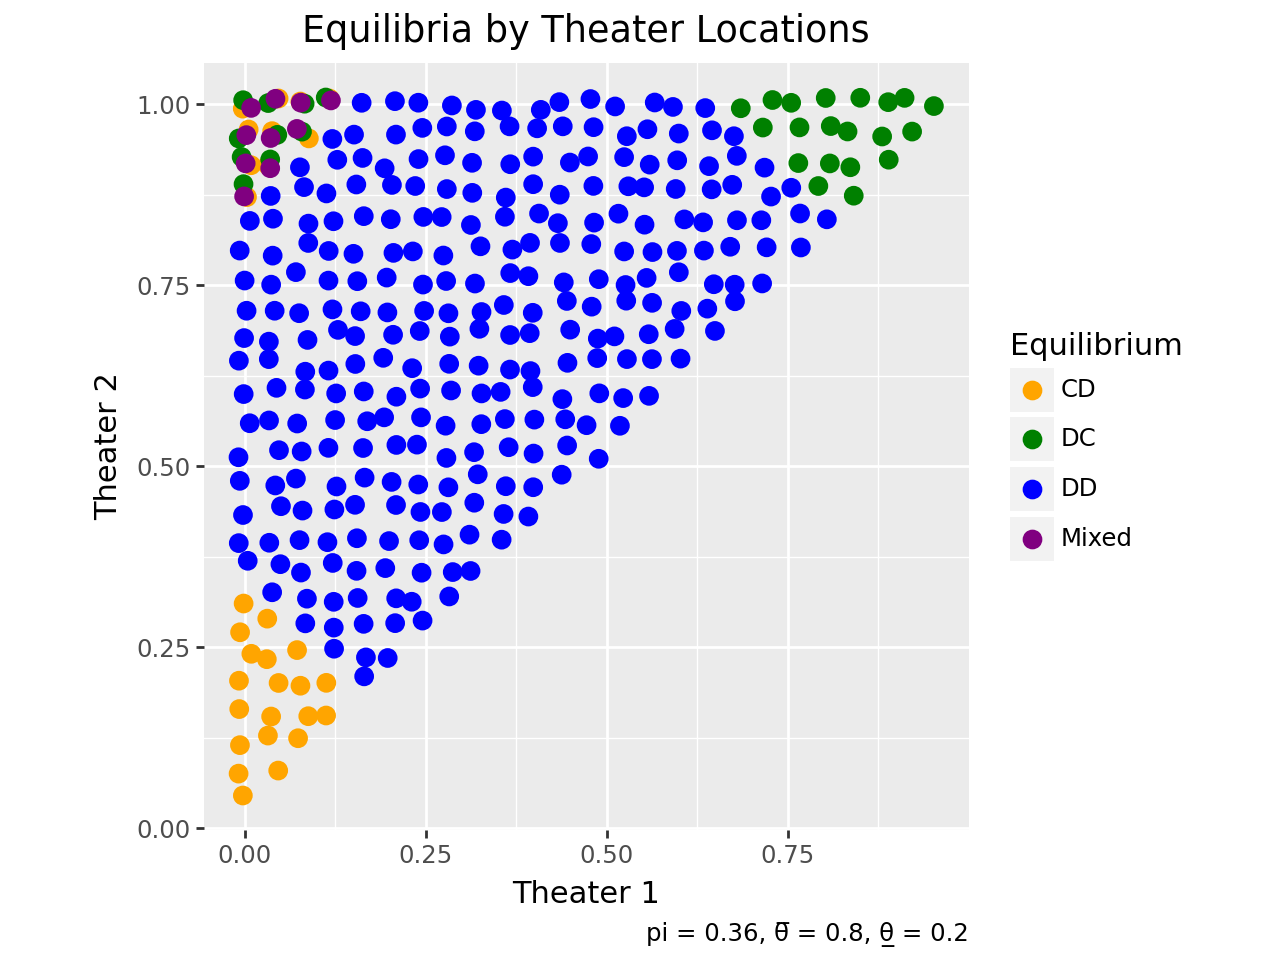

In [83]:
from plotnine import *

df123 = df[(df['pi']==0.36)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt435 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.36, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt435.save("V_2plot435")

plt435

       b1    b2  theta_upper  theta_lower  fc  fd   pi  u1cc  u2cc  u1dd  \
0    0.00  0.04          0.8          0.2   1   1  0.2  0.02  0.34  0.02   
1    0.00  0.08          0.8          0.2   1   1  0.2  0.04  0.36  0.04   
2    0.00  0.12          0.8          0.2   1   1  0.2  0.06  0.38  0.06   
3    0.04  0.08          0.8          0.2   1   1  0.2  0.06  0.34  0.06   
4    0.88  1.00          0.8          0.2   1   1  0.2  0.38  0.06  0.74   
..    ...   ...          ...          ...  ..  ..  ...   ...   ...   ...   
320  0.84  0.92          0.8          0.2   1   1  0.2  0.36  0.12  0.72   
321  0.84  0.96          0.8          0.2   1   1  0.2  0.38  0.10  0.74   
322  0.84  1.00          0.8          0.2   1   1  0.2  0.40  0.08  0.76   
323  0.88  0.92          0.8          0.2   1   1  0.2  0.34  0.10  0.70   
324  0.88  0.96          0.8          0.2   1   1  0.2  0.36  0.08  0.72   

     u2dd   u1cd   u2cd   u1dc   u2dc equilib  True_Value  
0    0.70  0.064  0.896  0.

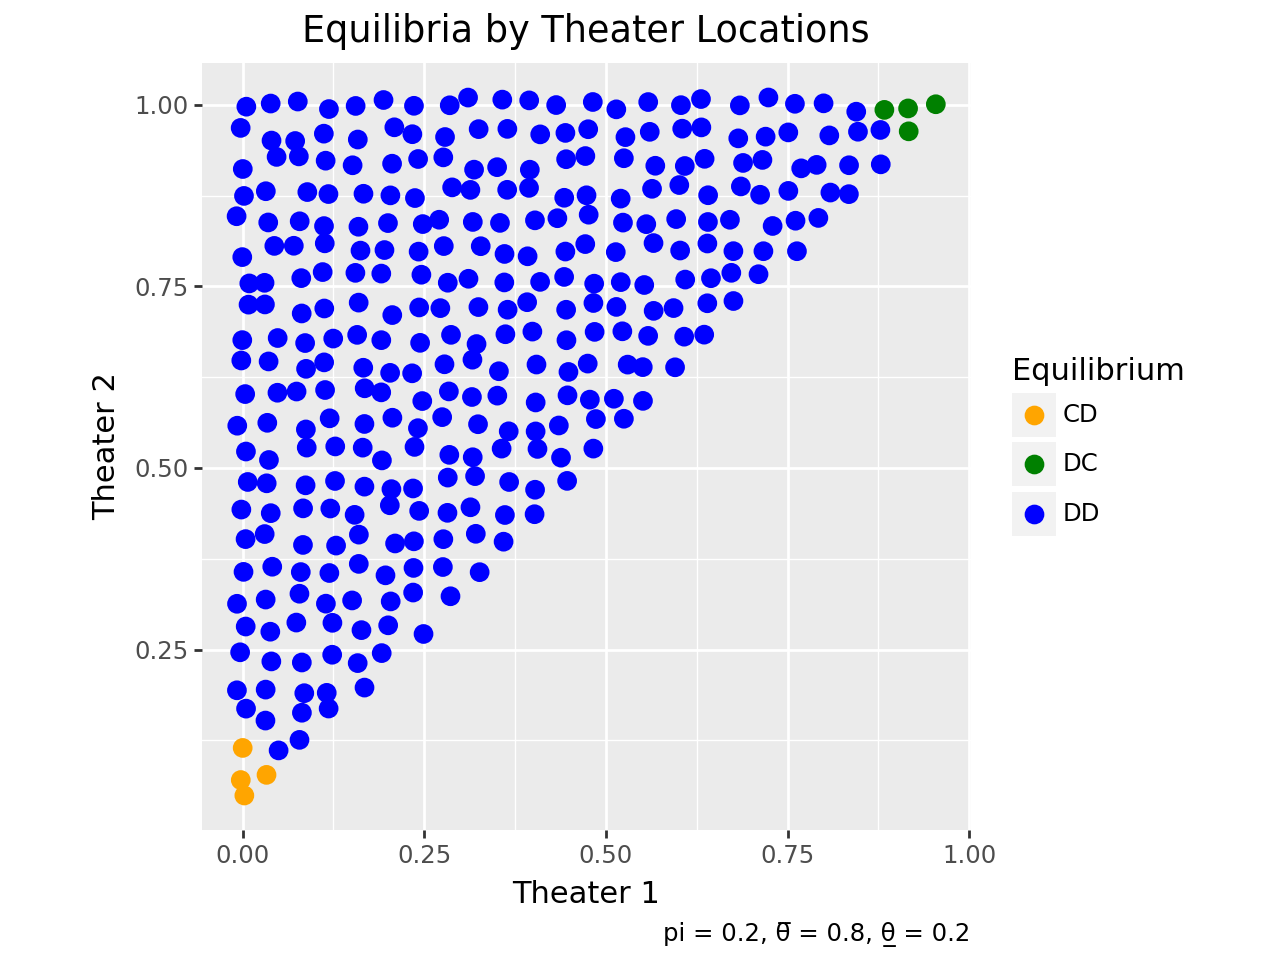

In [84]:
from plotnine import *

df123 = df[(df['pi']==0.2)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt425 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.2, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt425.save("V_2plot425")

plt425

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.04          0.8          0.2   1   1  0.16  0.020  0.316  0.020   
1    0.00  0.08          0.8          0.2   1   1  0.16  0.040  0.336  0.040   
2    0.92  1.00          0.8          0.2   1   1  0.16  0.336  0.040  0.744   
3    0.96  1.00          0.8          0.2   1   1  0.16  0.316  0.020  0.724   
4    0.00  0.12          0.8          0.2   1   1  0.16  0.060  0.356  0.060   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
320  0.84  1.00          0.8          0.2   1   1  0.16  0.376  0.080  0.784   
321  0.88  0.92          0.8          0.2   1   1  0.16  0.316  0.100  0.724   
322  0.88  0.96          0.8          0.2   1   1  0.16  0.336  0.080  0.744   
323  0.88  1.00          0.8          0.2   1   1  0.16  0.356  0.060  0.764   
324  0.92  0.96          0.8          0.2   1   1  0.16  0.316  0.060  0.724   

      u2dd   u1cd   u2cd   u1dc   u2dc 

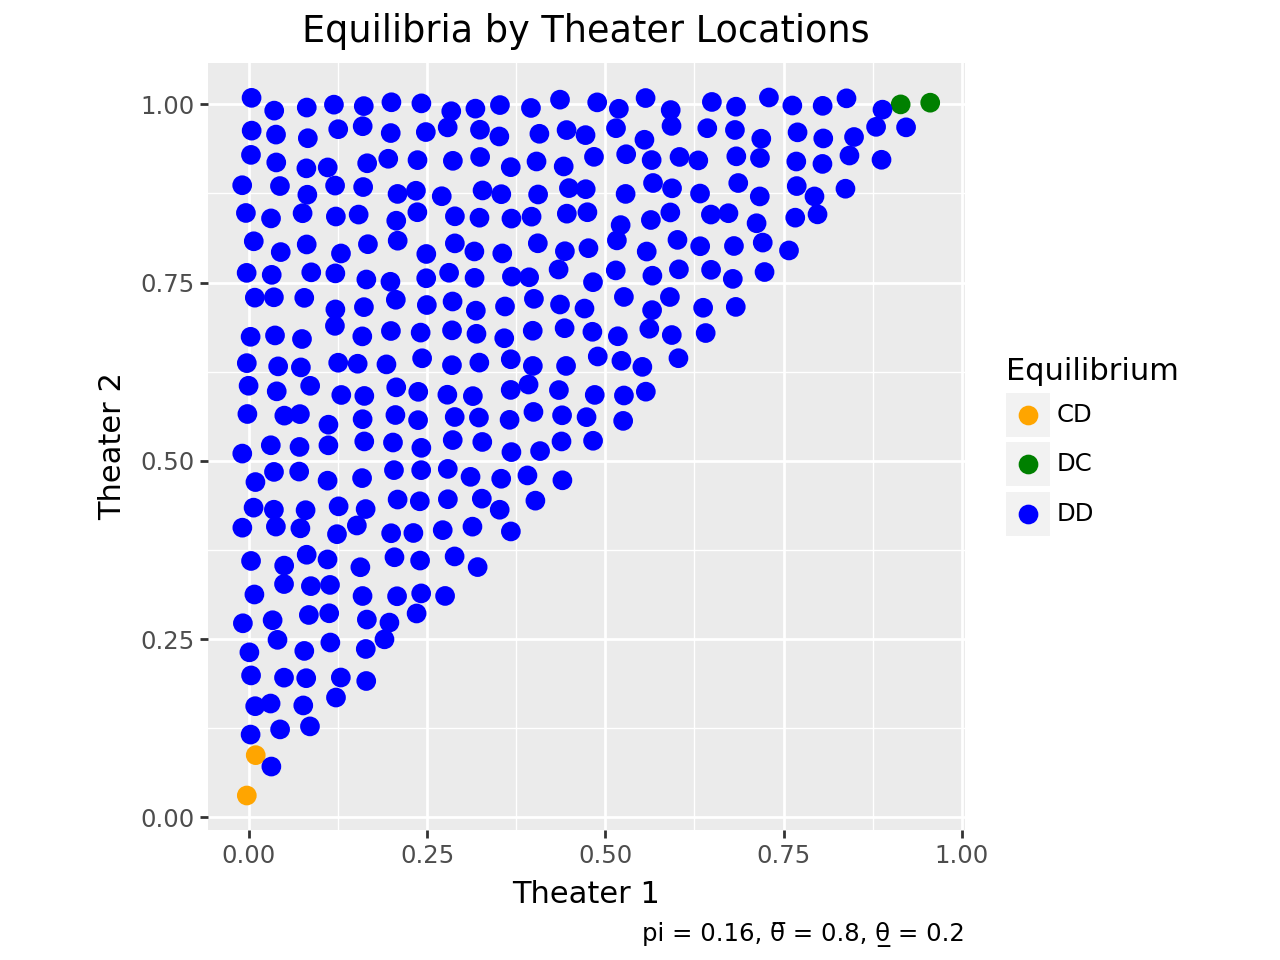

In [85]:
from plotnine import *

df123 = df[(df['pi']==0.16)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt415 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.16, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt415.save("V_2plot415")

plt415

       b1    b2  theta_upper  theta_lower  fc  fd   pi  u1cc  u2cc  u1dd  \
0    0.00  0.04          0.8          0.2   1   1  1.0  0.02  0.82  0.02   
1    0.00  0.08          0.8          0.2   1   1  1.0  0.04  0.84  0.04   
2    0.00  0.12          0.8          0.2   1   1  1.0  0.06  0.86  0.06   
3    0.00  0.16          0.8          0.2   1   1  1.0  0.08  0.88  0.08   
4    0.00  0.20          0.8          0.2   1   1  1.0  0.10  0.90  0.10   
..    ...   ...          ...          ...  ..  ..  ...   ...   ...   ...   
320  0.88  0.96          0.8          0.2   1   1  1.0  0.84  0.08  0.24   
321  0.88  1.00          0.8          0.2   1   1  1.0  0.86  0.06  0.26   
322  0.92  0.96          0.8          0.2   1   1  1.0  0.82  0.06  0.22   
323  0.92  1.00          0.8          0.2   1   1  1.0  0.84  0.04  0.24   
324  0.96  1.00          0.8          0.2   1   1  1.0  0.82  0.02  0.22   

     u2dd  u1cd  u2cd  u1dc  u2dc equilib  True_Value  
0    0.22  0.32   0.0   0.0  1.

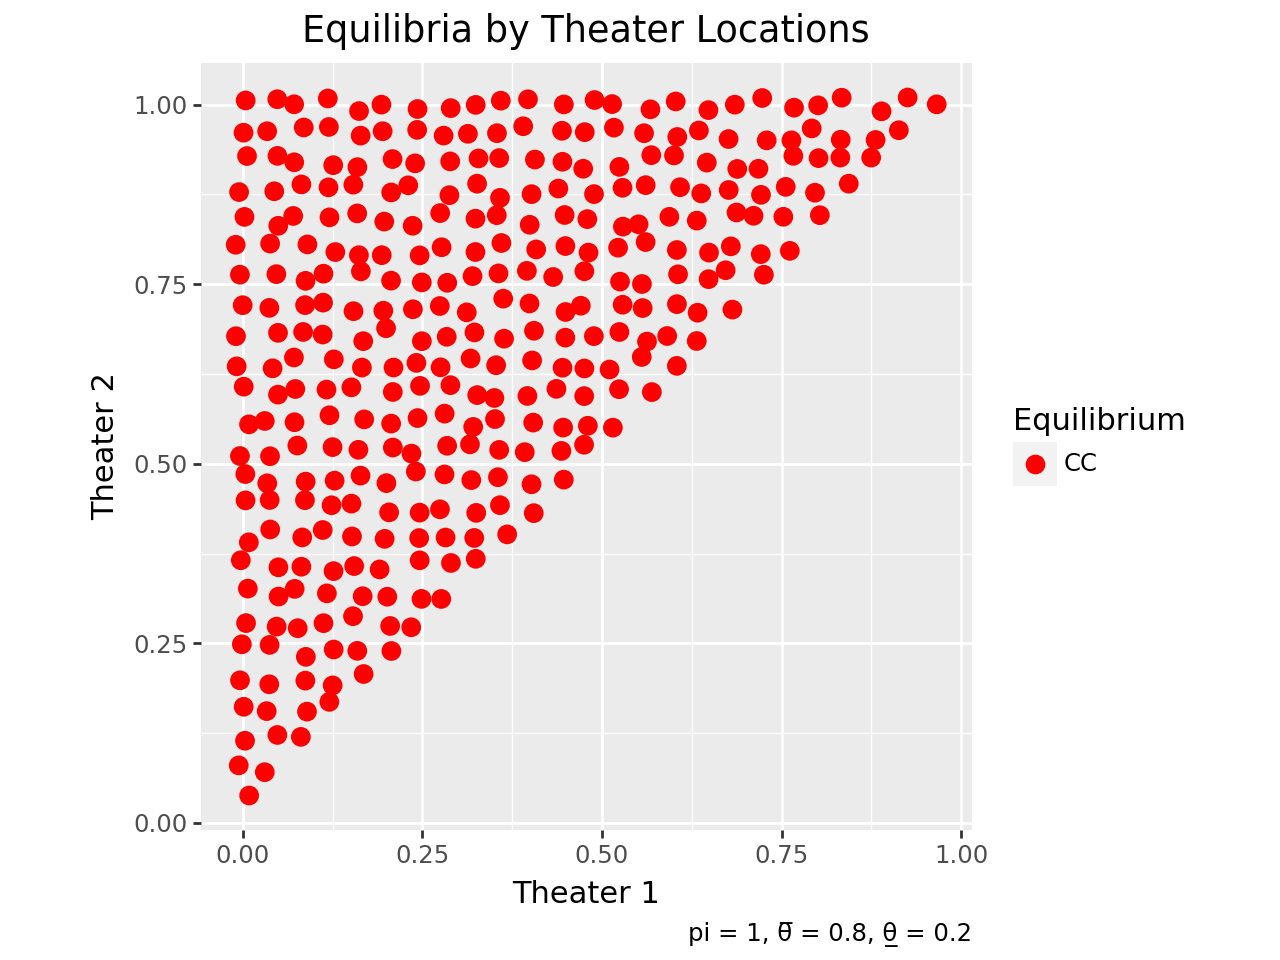

In [86]:
from plotnine import *

df123 = df[(df['pi']==1)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt5 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 1, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt5.save("V_2plot5")

plt5

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.36          0.8          0.2   1   1  0.64  0.180  0.662  0.180   
1    0.00  0.40          0.8          0.2   1   1  0.64  0.200  0.656  0.200   
2    0.00  0.44          0.8          0.2   1   1  0.64  0.213  0.643  0.207   
3    0.00  0.48          0.8          0.2   1   1  0.64  0.226  0.630  0.214   
4    0.00  0.52          0.8          0.2   1   1  0.64  0.238  0.618  0.222   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
340  0.04  0.96          0.8          0.2   1   1  0.64  0.406  0.406  0.334   
341  0.04  1.00          0.8          0.2   1   1  0.64  0.419  0.379  0.341   
342  0.08  0.96          0.8          0.2   1   1  0.64  0.434  0.394  0.366   
343  0.08  1.00          0.8          0.2   1   1  0.64  0.446  0.366  0.374   
344  0.12  1.00          0.8          0.2   1   1  0.64  0.474  0.354  0.406   

      u2dd   u1cd   u2cd   u1dc   u2dc 

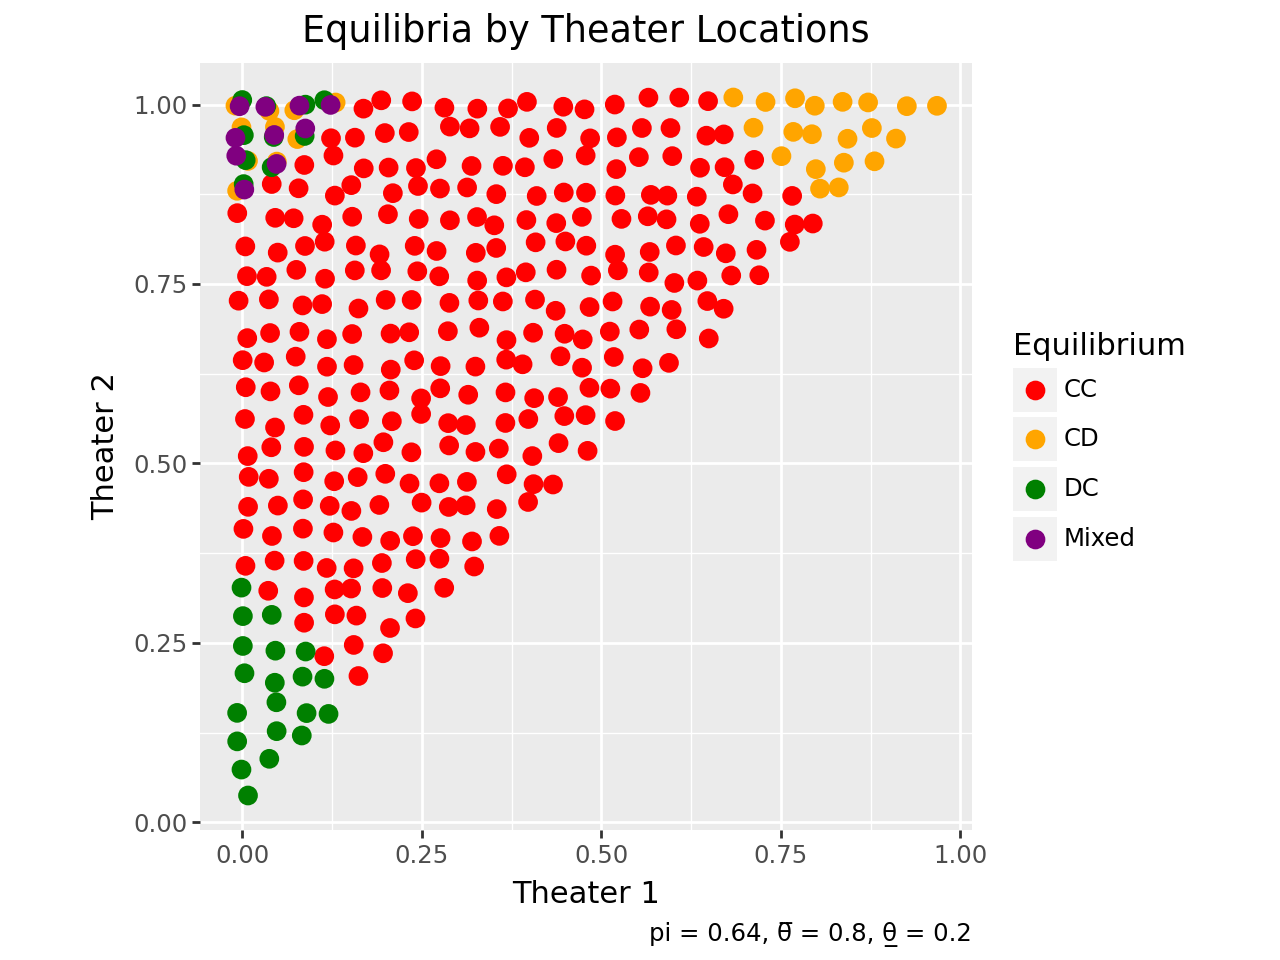

In [87]:
from plotnine import *

df123 = df[(df['pi']==0.64)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt565 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.64, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt565.save("V_2plot565")

plt565

       b1    b2  theta_upper  theta_lower  fc  fd   pi  u1cc   u2cc  u1dd  \
0    0.00  0.16          0.8          0.2   1   1  0.8  0.08  0.760  0.08   
1    0.00  0.20          0.8          0.2   1   1  0.8  0.10  0.780  0.10   
2    0.00  0.24          0.8          0.2   1   1  0.8  0.12  0.768  0.12   
3    0.00  0.28          0.8          0.2   1   1  0.8  0.14  0.756  0.14   
4    0.00  0.32          0.8          0.2   1   1  0.8  0.16  0.744  0.16   
..    ...   ...          ...          ...  ..  ..  ...   ...    ...   ...   
320  0.96  1.00          0.8          0.2   1   1  0.8  0.70  0.020  0.34   
321  0.00  0.04          0.8          0.2   1   1  0.8  0.02  0.700  0.02   
322  0.00  0.08          0.8          0.2   1   1  0.8  0.04  0.720  0.04   
323  0.00  0.12          0.8          0.2   1   1  0.8  0.06  0.740  0.06   
324  0.04  0.08          0.8          0.2   1   1  0.8  0.06  0.700  0.06   

      u2dd   u1cd   u2cd   u1dc   u2dc equilib  True_Value  
0    0.400  0.

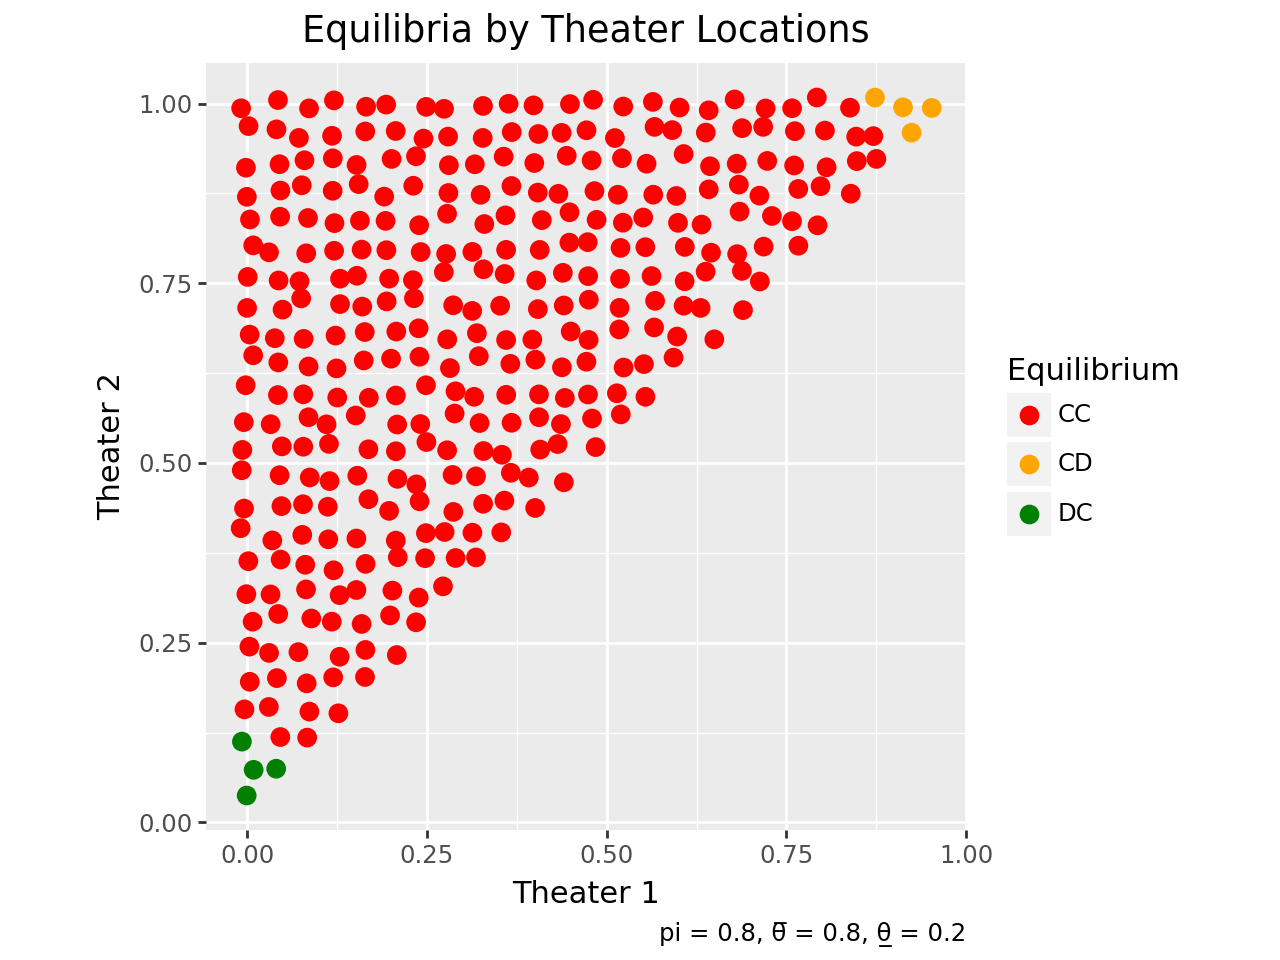

In [88]:
from plotnine import *

df123 = df[(df['pi']==0.8)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt575 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.8, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt575.save("V_2plot575")

plt575

       b1    b2  theta_upper  theta_lower  fc  fd    pi   u1cc   u2cc   u1dd  \
0    0.00  0.12          0.8          0.2   1   1  0.84  0.060  0.764  0.060   
1    0.00  0.16          0.8          0.2   1   1  0.84  0.080  0.784  0.080   
2    0.00  0.20          0.8          0.2   1   1  0.84  0.100  0.804  0.100   
3    0.00  0.24          0.8          0.2   1   1  0.84  0.120  0.790  0.120   
4    0.00  0.28          0.8          0.2   1   1  0.84  0.140  0.777  0.140   
..    ...   ...          ...          ...  ..  ..   ...    ...    ...    ...   
320  0.92  0.96          0.8          0.2   1   1  0.84  0.724  0.060  0.316   
321  0.92  1.00          0.8          0.2   1   1  0.84  0.744  0.040  0.336   
322  0.96  1.00          0.8          0.2   1   1  0.84  0.724  0.020  0.316   
323  0.00  0.04          0.8          0.2   1   1  0.84  0.020  0.724  0.020   
324  0.00  0.08          0.8          0.2   1   1  0.84  0.040  0.744  0.040   

      u2dd   u1cd   u2cd   u1dc   u2dc 

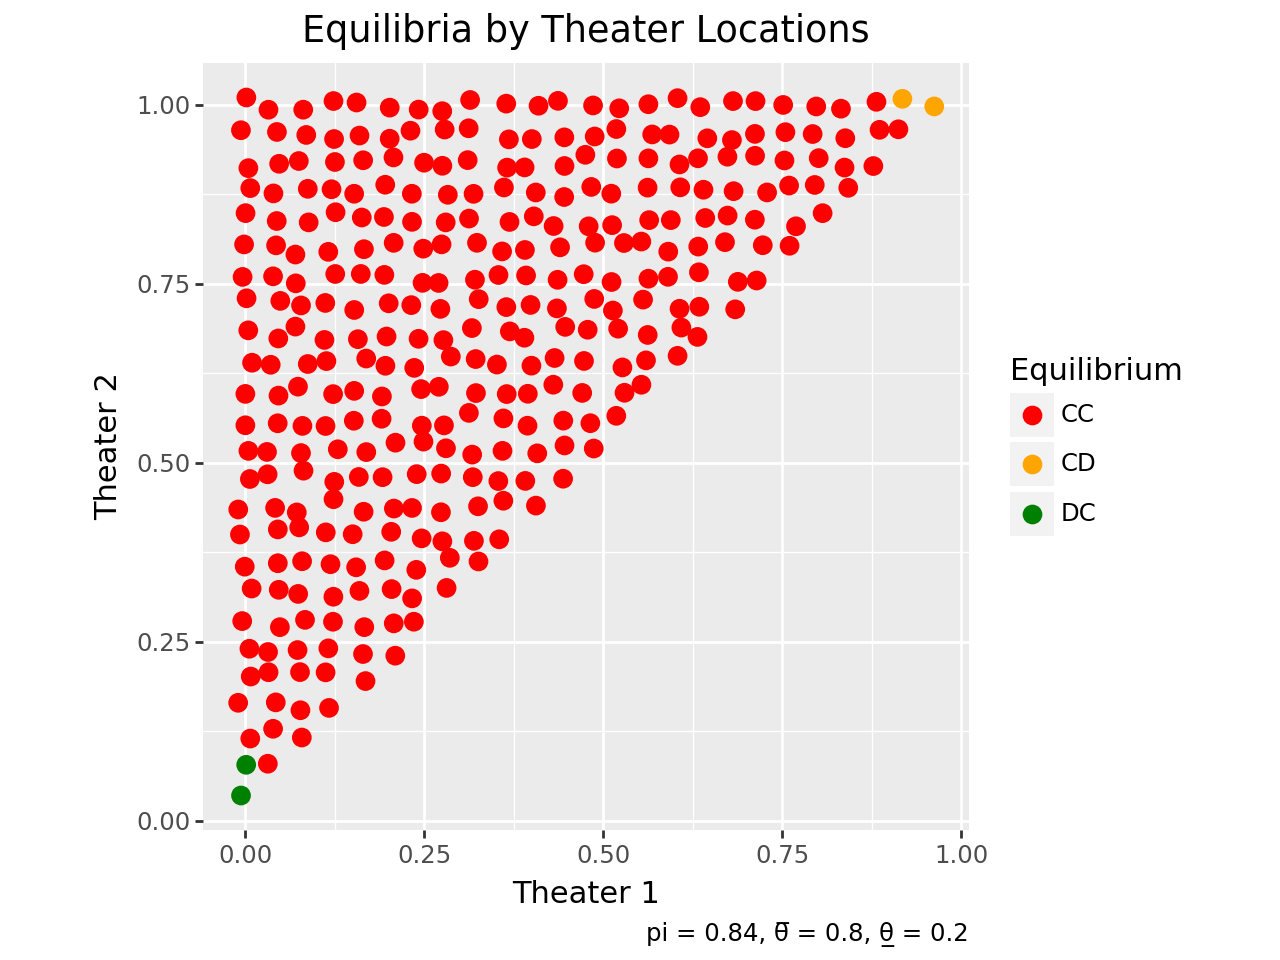

In [89]:
from plotnine import *

df123 = df[(df['pi']==0.84)&(df['theta_upper']==0.8)&(df['theta_lower']==0.2)]

df123CC = df123[df123['CC']==True]
df123DD = df123[df123['DD']==True]
df123CD = df123[df123['CD']==True]
df123DC = df123[df123['DC']==True]

# Melt the DataFrame
melted_df = pd.melt(df123, id_vars=['b1', 'b2', 'theta_upper', 'theta_lower', 'fc', 'fd',
       'pi', 'u1cc', 'u2cc', 'u1dd', 'u2dd', 'u1cd', 'u2cd', 'u1dc', 'u2dc'], value_vars=['CC', 'CD', 'DC', 'DD', 'Mixed'], var_name="equilib", value_name='True_Value')

# Filter out rows where True_Value is False
melted_df = melted_df[melted_df['True_Value']]

# Drop the True_Value column
# melted_df.drop(columns=['True_Value'], inplace=True)

# Reset index
melted_df.reset_index(drop=True, inplace=True)

print(melted_df)

plt585 = (
    ggplot()  # What data to use
    + aes(x="b1", y="b2", color="equilib")  # What variable to use
    + geom_jitter(melted_df, width = 0.01, height = 0.01, size=3)  # Geometric object to use for drawing
    + scale_color_manual({"CC":"red", "DD":"blue", "DC":"green", "CD":"orange", "Mixed":"purple"})
    + coord_fixed()
    + labs(title="Equilibria by Theater Locations", caption="pi = 0.84, \u03b8\u0305 = 0.8, \u03b8\u0332 = 0.2", x="Theater 1", y="Theater 2", color="Equilibrium")
)

plt585.save("V_2plot585")

plt585